<a href="https://colab.research.google.com/github/ProjectProRepo/Data-Mining-Projects/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Sentiment Analysis Project

**Objective:** To mine tweets related to a specific product/brand and perform sentiment analysis (positive, negative, neutral) to understand public opinion.

In [2]:
!pip install tweepy textblob wordcloud matplotlib seaborn scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 125.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 143.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 97.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 157.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 148.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 142.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 799.0/799.0 kB 42.7 MB/s eta 0:00:00


In [ ]:
import tweepy
import pandas as pd

bearer_token = "YOUR_BEARER_TOKEN"

client = tweepy.Client(bearer_token=bearer_token)

query = "iPhone 15 lang:en -is:retweet"
tweets = client.search_recent_tweets(query=query, max_results=100, tweet_fields=['created_at','author_id','text'])

data = []
for tweet in tweets.data:
    data.append([tweet.created_at, tweet.author_id, tweet.text])

df = pd.DataFrame(data, columns=['Date','User','Tweet'])
df.head()


In [2]:
import re
import string

def clean_tweet(text):
    text = re.sub(r'http\S+', '', text)       # remove links
    text = re.sub(r'@\w+', '', text)          # remove mentions
    text = re.sub(r'#', '', text)             # remove hashtags
    text = re.sub(r'[^\w\s]', '', text)       # remove punctuation
    text = text.lower()                       # lowercase
    return text

df['Clean_Tweet'] = df['Tweet'].apply(clean_tweet)


In [3]:
from textblob import TextBlob

def get_sentiment(text):
    score = TextBlob(text).sentiment.polarity
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Clean_Tweet'].apply(get_sentiment)
df['Sentiment'].value_counts()


,count
Sentiment,
Positive,46
Neutral,39
Negative,15


What’s the overall sentiment distribution?

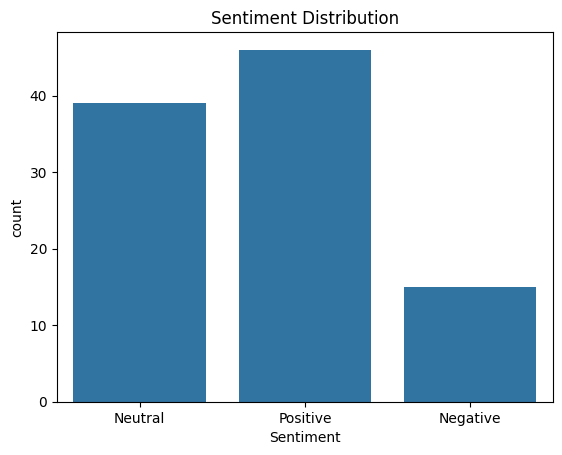

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Sentiment Distribution
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

What’s the overall sentiment distribution: Pie Chart

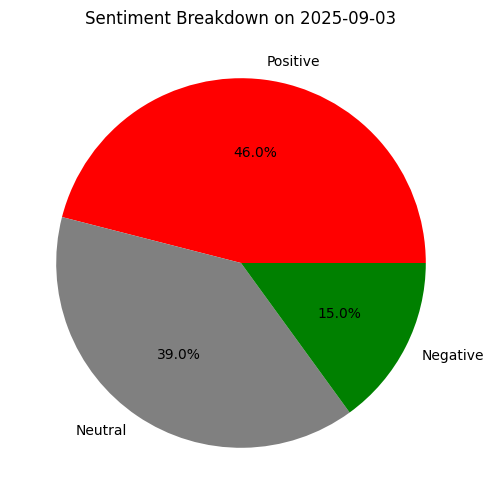

In [14]:
df['Sentiment'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['red','grey','green'],
    figsize=(6,6)
)
plt.title("Sentiment Breakdown on 2025-09-03")
plt.ylabel("")
plt.show()


What words are most common in each sentiment?

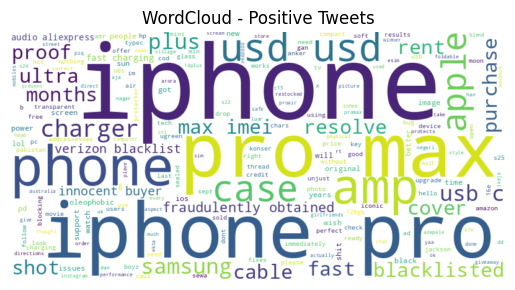

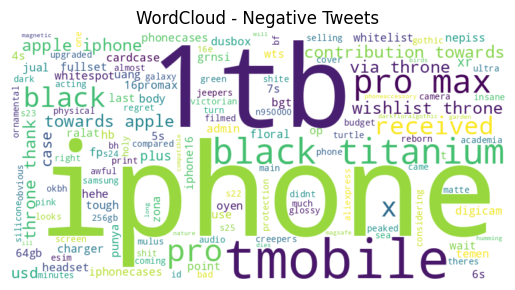

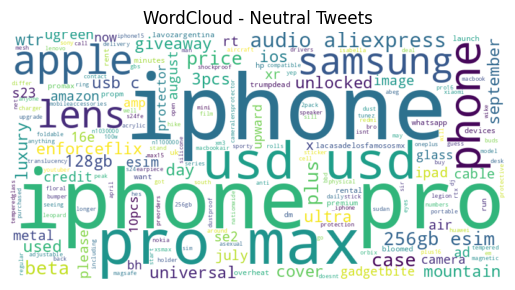

In [19]:
from wordcloud import WordCloud

for sentiment in ['Positive','Negative','Neutral']:
    text = " ".join(df[df['Sentiment']==sentiment]['Clean_Tweet'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud - {sentiment} Tweets")
    plt.show()


How does sentiment change over time (hours)?

In [9]:
df['Date'] = pd.to_datetime(df['Date'])


datetime64[ns, UTC]


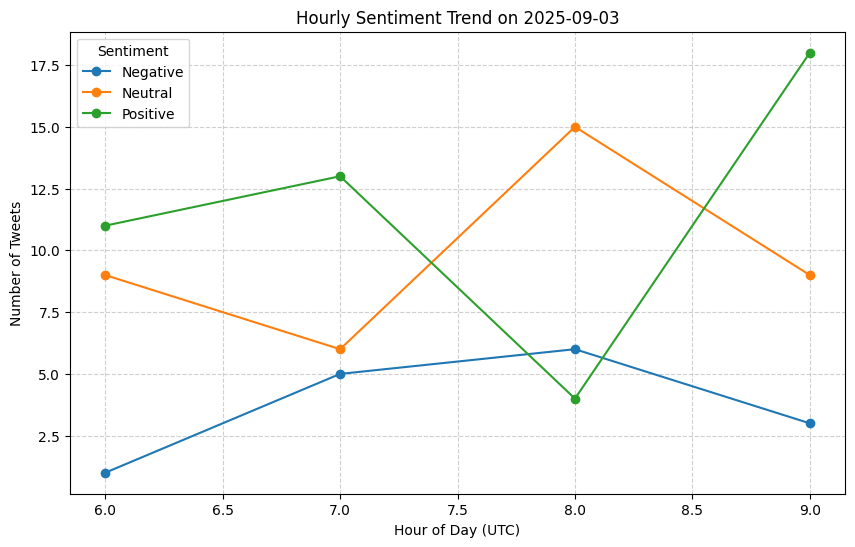

In [13]:
sentiment_hourly = (
    df.groupby([df['Date'].dt.hour, 'Sentiment'])
      .size()
      .unstack(fill_value=0)
)

sentiment_hourly.plot(kind='line', figsize=(10,6), marker='o')
plt.title("Hourly Sentiment Trend on 2025-09-03")
plt.xlabel("Hour of Day (UTC)")
plt.ylabel("Number of Tweets")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


Which hashtags are most popular?

/tmp/ipython-input-1554779161.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Hashtag', x='Count', data=hashtags_df, palette="viridis")


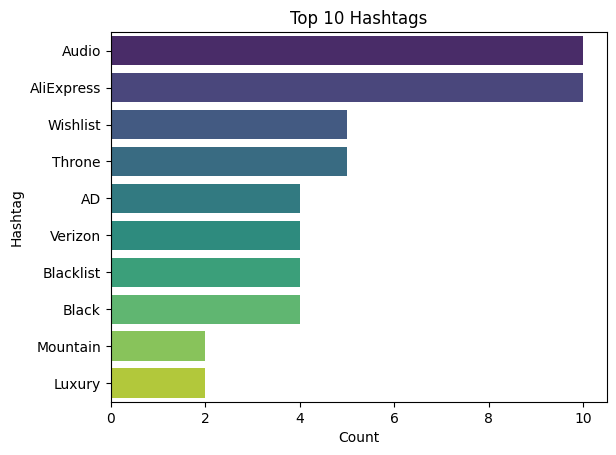

In [16]:
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# extract hashtags
hashtags = []
for tweet in df['Tweet']:
    hashtags.extend(re.findall(r"#(\w+)", tweet))

# get top 10
top_hashtags = Counter(hashtags).most_common(10)

# if empty, handle it
if len(top_hashtags) == 0:
    print("No hashtags found in dataset.")
else:
    # convert to DataFrame
    hashtags_df = pd.DataFrame(top_hashtags, columns=['Hashtag','Count'])

    # plot
    sns.barplot(y='Hashtag', x='Count', data=hashtags_df, palette="viridis")
    plt.title("Top 10 Hashtags")
    plt.xlabel("Count")
    plt.ylabel("Hashtag")
    plt.show()


How do positive vs negative tweets compare in length?

/tmp/ipython-input-3400716285.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='Tweet_Length', data=df, palette="Set3")


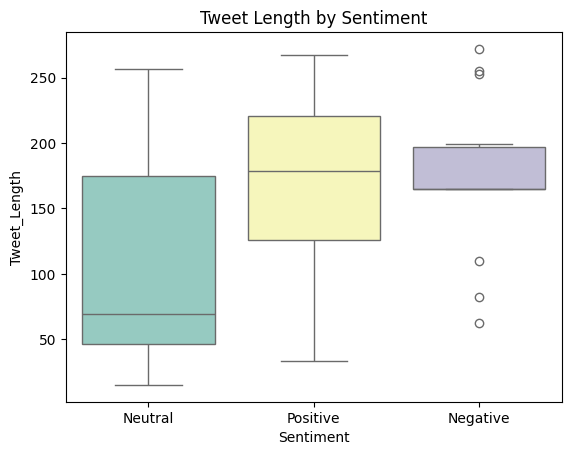

In [17]:
df['Tweet_Length'] = df['Clean_Tweet'].apply(len)
sns.boxplot(x='Sentiment', y='Tweet_Length', data=df, palette="Set3")
plt.title("Tweet Length by Sentiment")
plt.show()


What are the most common bigrams (word pairs)?

/tmp/ipython-input-1539437944.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Bigram', data=bigram_df, palette="viridis")


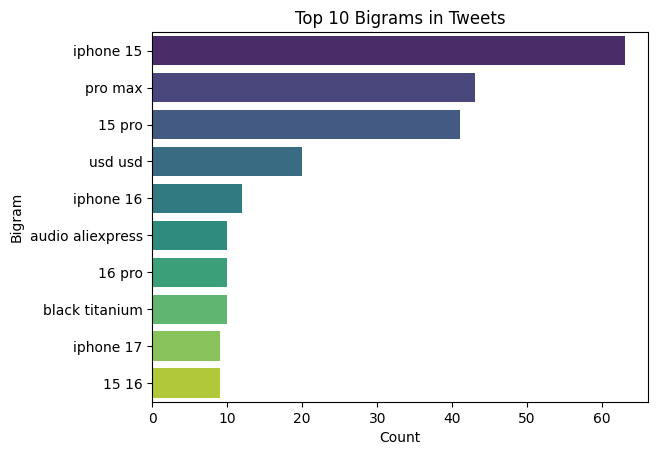

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(2,2), stop_words='english').fit(df['Clean_Tweet'])
bigrams = cv.transform(df['Clean_Tweet'])
sum_words = bigrams.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:10]

bigram_df = pd.DataFrame(words_freq, columns=['Bigram','Count'])
sns.barplot(x='Count', y='Bigram', data=bigram_df, palette="viridis")
plt.title("Top 10 Bigrams in Tweets")
plt.show()
